### **EX1**: Association Rule Mining

#### Finding frequent itemsets
Once you have the transactional records, use the apriori algorithm to find frequent itemsets with 
a suitable threshold for support for this data. Try to find a suitable threshold for the minimal 
support such that you can state a clear reason why you picked this threshold.

In [1]:
import pandas as pd
import csv
import numpy as np
from apyori import apriori

In [2]:
basket = []

In [3]:
with open('Dataset/store_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
       basket.append(tuple(row))

In [4]:
frequent_itemsets = apriori(basket, min_support=0.0045)

In [68]:
frequent_itemset_result = list(frequent_itemsets)

In [90]:
item_rule = []
support = []

In [91]:
for item in frequent_itemset_result:
    pair = item[0] 
    items = [x for x in pair]
    item_rule.append(items)
    support.append(item[1])
    confident.append(item[2][0][2])
    lift.append(item[2][0][3])

In [92]:
df = pd.DataFrame(list(zip(item_rule, support)),
               columns =['Item_rule', 'Support'])
df

,Item_rule,Support
0,[almonds],0.020397
1,[antioxydant juice],0.008932
2,[asparagus],0.004666
3,[avocado],0.033329
4,[babies food],0.004533
...,...,...
837,"[whole wheat rice, mineral water, spaghetti]",0.006266
838,"[pancakes, olive oil, spaghetti]",0.005066
839,"[mineral water, spaghetti, chocolate, eggs]",0.004533
840,"[mineral water, milk, chocolate, spaghetti]",0.004933


In [101]:
confident_threshold = 0.5
confident = []
lift = []
antecedents = []
consequences = []
for item in frequent_itemset_result:
    for rule in item[2]:
        if rule[2] > confident_threshold:
            antecedents.append([x for x in rule[0]])
            consequences.append([y for y in rule[1]])
            confident.append(rule[2])
            lift.append(rule[3])

In [102]:
df_rule = pd.DataFrame(list(zip(antecedents,consequences,confident,lift)),
               columns =['antecedents', 'consequences','confident','lift'])
df_rule

,antecedents,consequences,confident,lift
0,"[chocolate, chicken]",[mineral water],0.518182,2.173871
1,"[ground beef, chicken]",[spaghetti],0.507042,2.912193
2,"[pancakes, chicken]",[mineral water],0.529412,2.220983
3,"[olive oil, chocolate]",[mineral water],0.504065,2.114649
4,"[soup, chocolate]",[mineral water],0.552632,2.318395
5,"[cooking oil, eggs]",[mineral water],0.545455,2.288286
6,"[cooking oil, ground beef]",[spaghetti],0.571429,3.281995
7,"[cooking oil, pancakes]",[mineral water],0.593220,2.488672
8,"[ground beef, eggs]",[mineral water],0.506667,2.125563
9,"[soup, eggs]",[mineral water],0.544118,2.282677


In [131]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from sklearn.model_selection import train_test_split

te = TransactionEncoder()
te_ary = te.fit_transform(basket)
data_df = pd.DataFrame(te_ary, columns=te.columns_)
X_50_1 , X_50_2 = train_test_split(data_df, test_size=0.5, random_state=42)

print(len(X_50_1), len(X_50_2))

3750 3751


In [142]:
frequent_itemsets_X_50_1 = fpgrowth(X_50_1, min_support=0.0045, use_colnames=True)
frequent_itemsets_X_50_2 = apriori(X_50_2, min_support=0.0045, use_colnames=True)

In [143]:
frequent_itemsets_X_50_1

,support,itemsets
0,0.043200,(champagne)
1,0.135733,(milk)
2,0.079200,(cake)
3,0.071200,(olive oil)
4,0.051467,(cooking oil)
...,...,...
943,0.004800,"(pancakes, ham)"
944,0.005333,"(barbecue sauce, mineral water)"
945,0.004533,"(barbecue sauce, eggs)"
946,0.005333,"(fromage blanc, spaghetti)"


In [144]:
frequent_itemsets_X_50_2

,support,itemsets
0,0.019728,(almonds)
1,0.007198,(antioxydant juice)
2,0.031192,(avocado)
3,0.005065,(babies food)
4,0.008264,(bacon)
...,...,...
837,0.004532,"(shrimp, olive oil, spaghetti)"
838,0.005065,"(shrimp, pancakes, spaghetti)"
839,0.005065,"(pancakes, turkey, spaghetti)"
840,0.004799,"(chocolate, ground beef, mineral water, eggs)"


In [145]:
# rules for first set
association_rules(frequent_itemsets_X_50_1, metric="confidence",
                  min_threshold=0.5).sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52,"(whole wheat pasta, mineral water)",(olive oil),0.009333,0.071200,0.004800,0.514286,7.223114,0.004135,1.912235
37,"(frozen vegetables, chocolate, spaghetti)",(milk),0.008533,0.135733,0.004533,0.531250,3.913924,0.003375,1.843769
53,"(whole wheat pasta, spaghetti)",(milk),0.010133,0.135733,0.005067,0.500000,3.683694,0.003691,1.728533
41,"(olive oil, tomatoes)",(spaghetti),0.006933,0.181333,0.004533,0.653846,3.605769,0.003276,2.365037
48,"(grated cheese, eggs)",(spaghetti),0.009600,0.181333,0.005867,0.611111,3.370098,0.004126,2.105143
12,"(milk, ground beef, chocolate)",(spaghetti),0.007467,0.181333,0.004533,0.607143,3.348214,0.003179,2.083879
23,"(soup, frozen vegetables)",(spaghetti),0.008533,0.181333,0.005067,0.593750,3.274357,0.003519,2.015179
13,"(frozen vegetables, ground beef)",(spaghetti),0.016800,0.181333,0.009600,0.571429,3.151261,0.006554,1.910222
44,"(pancakes, whole wheat rice)",(mineral water),0.006133,0.249600,0.004800,0.782609,3.135452,0.003269,3.451840
45,"(shrimp, ground beef)",(spaghetti),0.012267,0.181333,0.006933,0.565217,3.117008,0.004709,1.882933


In [146]:
association_rules(frequent_itemsets_X_50_2, metric="confidence",
                  min_threshold=0.5).sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(cooking oil, ground beef)",(spaghetti),0.007998,0.166889,0.004799,0.600000,3.595208,0.003464,2.082778
26,"(pancakes, olive oil)",(spaghetti),0.010930,0.166889,0.005599,0.512195,3.069080,0.003774,1.707878
27,"(shrimp, olive oil)",(spaghetti),0.009064,0.166889,0.004532,0.500000,2.996006,0.003019,1.666222
21,"(olive oil, tomatoes)",(mineral water),0.007465,0.227139,0.005065,0.678571,2.987466,0.003370,2.404455
4,"(soup, chocolate)",(mineral water),0.008798,0.227139,0.005865,0.666667,2.935055,0.003867,2.318582
20,"(soup, olive oil)",(mineral water),0.008531,0.227139,0.005332,0.625000,2.751614,0.003394,2.060962
11,"(soup, frozen vegetables)",(mineral water),0.007465,0.227139,0.004532,0.607143,2.672996,0.002837,1.967281
18,"(milk, turkey)",(mineral water),0.011464,0.227139,0.006931,0.604651,2.662026,0.004328,1.954883
19,"(shrimp, olive oil)",(mineral water),0.009064,0.227139,0.005332,0.588235,2.589754,0.003273,1.876947
17,"(milk, soup)",(mineral water),0.014130,0.227139,0.008264,0.584906,2.575095,0.005055,1.861891


#### **EX2**: Cluster Analysis

##### kk-Means Clustering
Use kk-Means to cluster the data and find a suitable number of clusters for k. Use a combination 
of knowledge you already have about the data, visualizations, as well as the within-sum-ofsquares to determine a suitable number of clusters.
##### EM Clustering
Use the EM algorithm to determine multivariate clusters in the data. Determine a suitable 
number of clusters using the Bayesian Information Criterion (BIC).
##### DBSCAN Clustering
Use DBSCAN to cluster the data and find suitable values for epsilon and minPts. Use a 
combination of knowledge you already have about the data and visualizations.
##### Hierarchical Clustering
Use hierarchical clustering with single linkage to determine clusters within the housing data. 
Find a suitable cut-off for the clusters using a dendrogram.
##### Compare the Clustering Results
How are the clustering results different between the algorithms? Consider, e.g., the number of 
clusters, the shape of clusters, general problems with using the algorithms, and the insights you 
get from each algorithm.


In [5]:
import sklearn

from sklearn import metrics
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_boston

data = load_boston()

In [7]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
df = pd.DataFrame({data.feature_names[i]:data.data[:,i] for i in range(len(data.feature_names))})
df = df.assign(Target=data.target)

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...
Training 9 cluster algo...
Training 10 cluster algo...
Training 11 cluster algo...
Training 12 cluster algo...
Training 13 cluster algo...
Training 14 cluster algo...
Training 15 cluster algo...


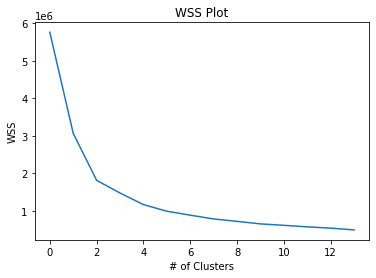

In [161]:
wss_list = []
for i in range(2,16):
    print('Training {} cluster algo...'.format(i))
    km = KMeans(n_clusters=i)
    km.fit(df)
    wss_list.append(km.inertia_)
plt.plot(wss_list)
plt.title('WSS Plot')
plt.xlabel('# of Clusters')
plt.ylabel('WSS')
plt.show()

The elbow is 3

In [198]:
from sklearn.model_selection import ParameterGrid
parameters = {'n_clusters' : [x for x in range(2,16)]}
parameters_grid = ParameterGrid(parameters)
best_score = -1
model = KMeans()
for g in parameters_grid:
    model.set_params(**g)
    model.fit(df)

    ss = metrics.silhouette_score(df,model.labels_)
    print('Parameter: ', g, 'Score: ',ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.6892003373357976
Parameter:  {'n_clusters': 3} Score:  0.7206527282357368
Parameter:  {'n_clusters': 4} Score:  0.5626704008036291
Parameter:  {'n_clusters': 5} Score:  0.5652227192356828
Parameter:  {'n_clusters': 6} Score:  0.494150883377989
Parameter:  {'n_clusters': 7} Score:  0.49943501274361807
Parameter:  {'n_clusters': 8} Score:  0.45101633615654363
Parameter:  {'n_clusters': 9} Score:  0.46255226639239116
Parameter:  {'n_clusters': 10} Score:  0.4494292715328482
Parameter:  {'n_clusters': 11} Score:  0.4516453359638889
Parameter:  {'n_clusters': 12} Score:  0.4097185266404757
Parameter:  {'n_clusters': 13} Score:  0.3797565397157612
Parameter:  {'n_clusters': 14} Score:  0.39247932696800053
Parameter:  {'n_clusters': 15} Score:  0.39117993440709725


In [163]:
best_grid

{'n_clusters': 3}

In [165]:
kmeans = KMeans(n_clusters=3, init="k-means++",random_state=42)
y_kmeans = kmeans.fit_predict(df)

In [168]:
centroid = kmeans.cluster_centers_

In [182]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

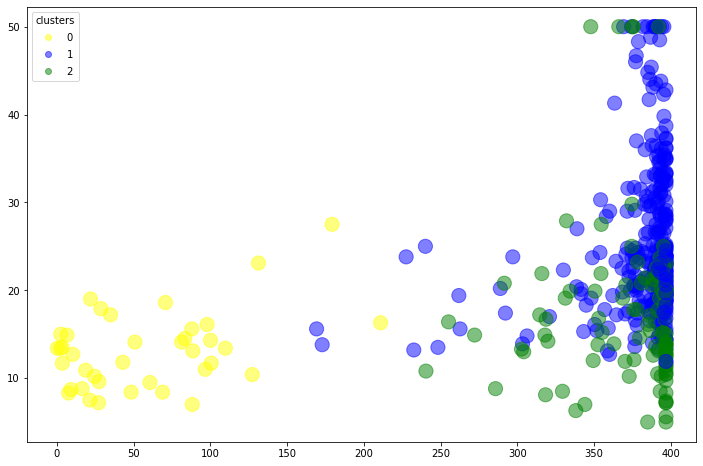

In [187]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['yellow','blue','green']

sc = ax.scatter(df['B'],df['Target'],c=y_kmeans,cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5,s=200)
ax.legend(*sc.legend_elements(),title='clusters')

In [240]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
dbscan = DBSCAN()
best_score = -1

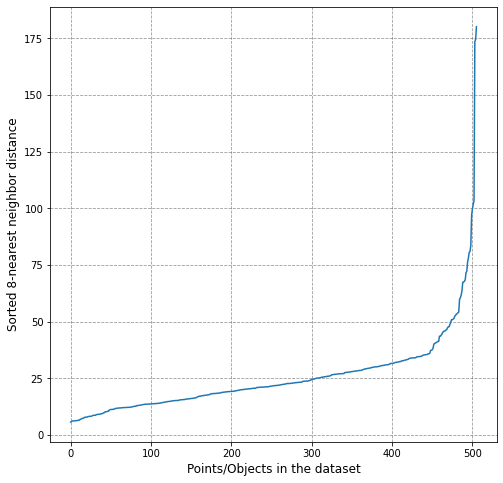

In [261]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


get_kdist_plot(X=df, k=8)


In [242]:
data.feature_names.size

13

In [262]:
parameters = {'eps' : [25,30,35,38,40,45,50],
            'min_samples': [14,20,25]}

parameters_grid = ParameterGrid(parameters)
list(parameters_grid)

[{'eps': 25, 'min_samples': 14},
 {'eps': 25, 'min_samples': 20},
 {'eps': 25, 'min_samples': 25},
 {'eps': 30, 'min_samples': 14},
 {'eps': 30, 'min_samples': 20},
 {'eps': 30, 'min_samples': 25},
 {'eps': 35, 'min_samples': 14},
 {'eps': 35, 'min_samples': 20},
 {'eps': 35, 'min_samples': 25},
 {'eps': 38, 'min_samples': 14},
 {'eps': 38, 'min_samples': 20},
 {'eps': 38, 'min_samples': 25},
 {'eps': 40, 'min_samples': 14},
 {'eps': 40, 'min_samples': 20},
 {'eps': 40, 'min_samples': 25},
 {'eps': 45, 'min_samples': 14},
 {'eps': 45, 'min_samples': 20},
 {'eps': 45, 'min_samples': 25},
 {'eps': 50, 'min_samples': 14},
 {'eps': 50, 'min_samples': 20},
 {'eps': 50, 'min_samples': 25}]

In [263]:
for g in parameters_grid:
    model.set_params(**g)
    model.fit(df)

    ss = metrics.silhouette_score(df,model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 25, 'min_samples': 14} Score:  -0.0044702433363994765
Parameter:  {'eps': 25, 'min_samples': 20} Score:  -0.016358764644091743
Parameter:  {'eps': 25, 'min_samples': 25} Score:  -0.025332264010460372
Parameter:  {'eps': 30, 'min_samples': 14} Score:  0.273051235260202
Parameter:  {'eps': 30, 'min_samples': 20} Score:  0.19613655450898687
Parameter:  {'eps': 30, 'min_samples': 25} Score:  0.2243525185295346
Parameter:  {'eps': 35, 'min_samples': 14} Score:  0.3593568844863609
Parameter:  {'eps': 35, 'min_samples': 20} Score:  0.366621936164903
Parameter:  {'eps': 35, 'min_samples': 25} Score:  0.3255205710284819
Parameter:  {'eps': 38, 'min_samples': 14} Score:  0.4720891850100307
Parameter:  {'eps': 38, 'min_samples': 20} Score:  0.39930998146309904
Parameter:  {'eps': 38, 'min_samples': 25} Score:  0.3492299943171146
Parameter:  {'eps': 40, 'min_samples': 14} Score:  0.4785332109170067
Parameter:  {'eps': 40, 'min_samples': 20} Score:  0.4190960408011261
Parameter:

In [264]:
best_grid

{'eps': 50, 'min_samples': 25}

In [265]:
dbscan.set_params(**best_grid)
dbscan.fit(df)

DBSCAN(eps=50, min_samples=25)

In [266]:
len(dbscan.labels_)

506

In [267]:
n_cluster = len(set(dbscan.labels_))
n_cluster

3

In [268]:
n_noise = list(model.labels_).count(-1)
n_noise

70

#### Expectation-maximization (Gaussian Mixture Model)

In [11]:
from sklearn.mixture import GaussianMixture

In [13]:
gm_bic = []
gm_score = []
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000)
    gm.fit(df)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(df)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(df)))
    print("-"*100)
    gm_bic.append(-gm.bic(df))
    gm_score.append(gm.score(df))

BIC for number of cluster(s) 2: 26721.640028647027
Log-likelihood score for number of cluster(s) 2: -24.934286328742413
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: 21900.923565458244
Log-likelihood score for number of cluster(s) 3: -19.432408005122575
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: 20286.145211094994
Log-likelihood score for number of cluster(s) 4: -17.09845271393903
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: 18471.064182380964
Log-likelihood score for number of cluster(s) 5: -14.566569878930606
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: 17362.582207667943
Log-likelihood score for number of cluster(s) 6: -12.7329074530140

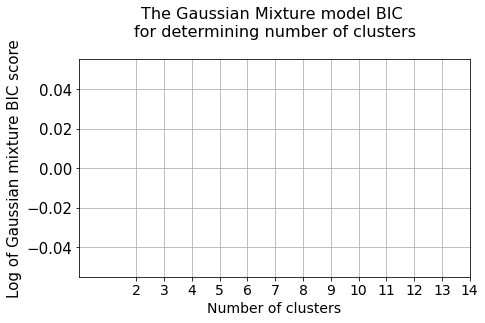

In [15]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

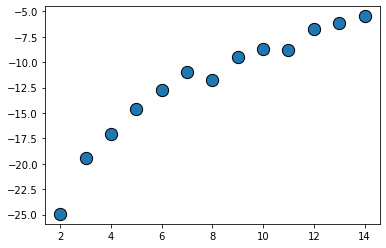

In [18]:
plt.scatter(x=[i for i in range(2,15)],y=gm_score,s=150,edgecolor='k')
plt.show()

#### Hierarchical Clustering.

In [20]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
Z = linkage(df, 'ward')

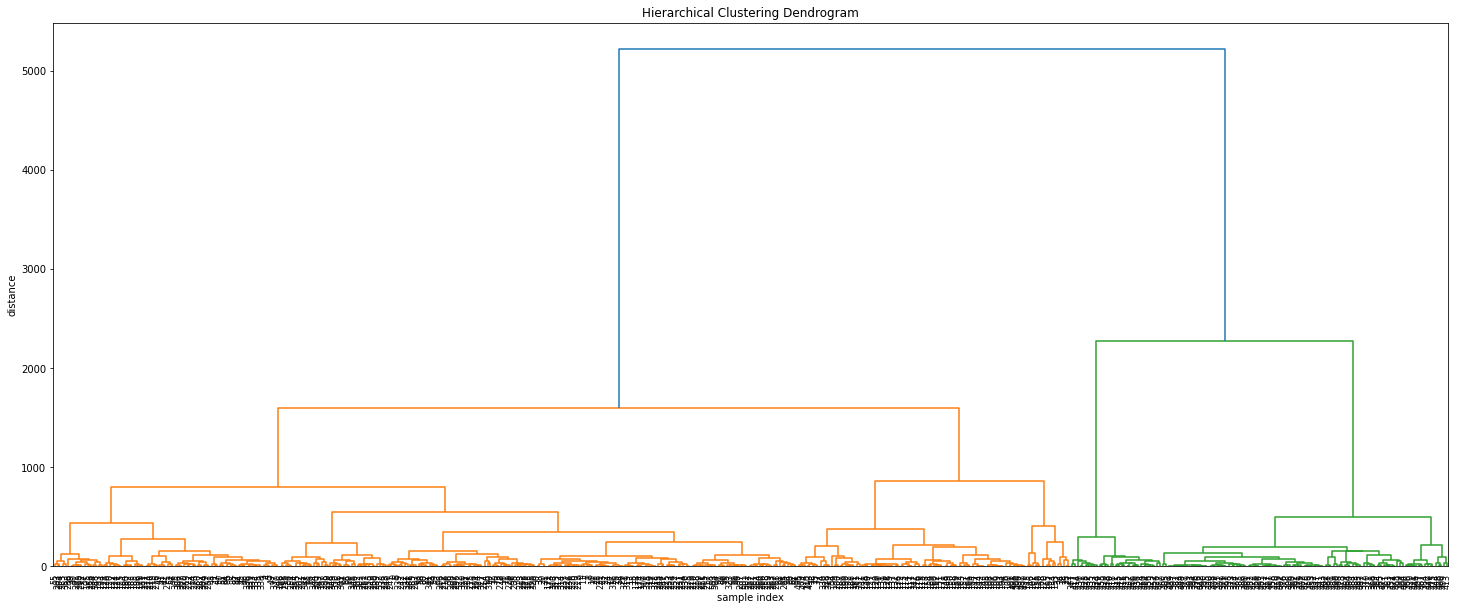

In [22]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

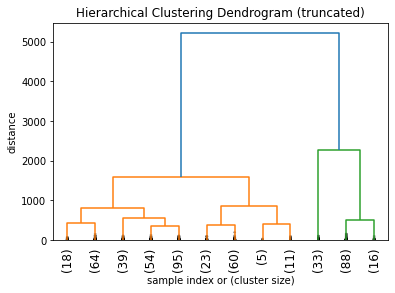

In [23]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [24]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [29]:
max_d = 2000  # max_d as in max_distance

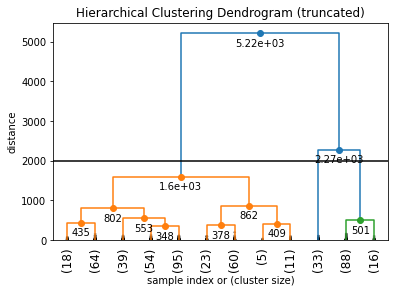

In [30]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

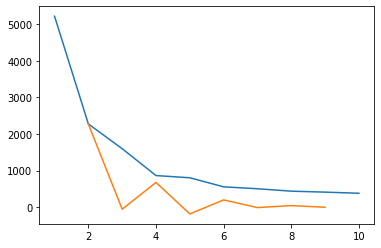

clusters: 2


In [31]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

#### Compare

#### **Ex3**: Time Series Analysis

#### Time series analysis with ARMA. Dataset revenue data about online and mail retail business 
(online_and_mail_shopping.csv)
#### Detrending and seasonal adjustment with regression and mean values
Detrend the data using a linear regression and then do a seasonal adjustment by removing the 
monthly mean values from the data. Visualize the effects of these adjustments.
#### Detrending and seasonal adjustment with differencing
Use first order differencing for detrending the data and do a monthly seasonal adjustment for the 
detrended data. Visualize the effects of these adjustments.
#### Forecasting with ARMA
Fit an ARMA model with appropriate parameters pp and qq to the detrended and seasonal 
adjusted data (both versions) without the year 2013 (i.e., drop year 2013 for the model fitting). 
You can use plots of the autocorrelation and the partial autocorrelation for determining good 
values. Use the fitted models to forecast the values for the year 2013 and visualize the 
differences between the forecasted values and the actual values. You should do this with the 
actual values, i.e., including trend and seasonal effect.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_shopping = pd.read_csv("D:\Learnmore\DBM\Data Mining\Dataset\online_and_mail_shopping.csv")
df_shopping.head()

,month,mdollars
0,2002-01,9912
1,2002-02,8925
2,2002-03,9670
3,2002-04,9684
4,2002-05,9713


In [3]:
df_shopping.index = pd.to_datetime(df_shopping['month'])

In [4]:
df_shopping = df_shopping.drop('month',axis=1)
df_shopping.head()

,mdollars
month,
2002-01-01,9912
2002-02-01,8925
2002-03-01,9670
2002-04-01,9684
2002-05-01,9713


<AxesSubplot:xlabel='month'>

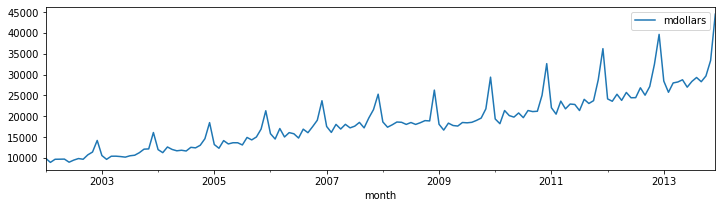

In [5]:
df_shopping.plot(figsize=(12,3))

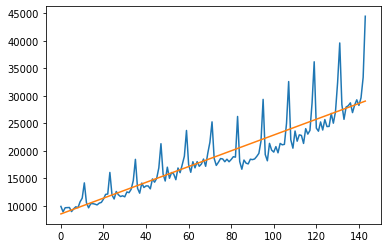

In [5]:
from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(df_shopping))]
X = np.reshape(X, (len(X), 1))
y = df_shopping.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()

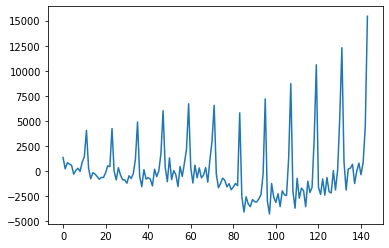

In [6]:
# detrend
detrended = [(y[i]-trend[i])[0] for i in range(0, len(df_shopping))]
# plot detrended
plt.plot(detrended)
plt.show()

In [7]:
df_shopping['detrended'] = detrended
df_shopping.head()

,mdollars,detrended
month,,
2002-01-01,9912,1366.383525
2002-02-01,8925,235.887582
2002-03-01,9670,837.391639
2002-04-01,9684,707.895696
2002-05-01,9713,593.399754


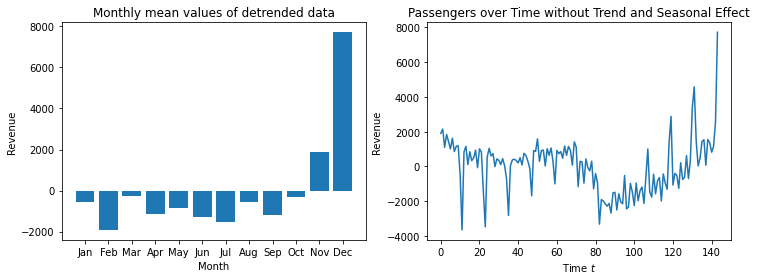

In [8]:
monthly_means = df_shopping['detrended'].groupby(df_shopping['detrended'].index.month).mean()

df_shopping['detrended_adj'] = df_shopping['detrended'] - np.tile(monthly_means,12)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Monthly mean values of detrended data')
axes[0].bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], monthly_means)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Passengers over Time without Trend and Seasonal Effect')
axes[1].plot(X, df_shopping['detrended_adj'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()

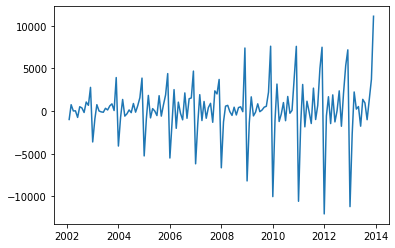

In [53]:
diff = df_shopping['mdollars'].diff(1)
plt.plot(diff)
plt.show()

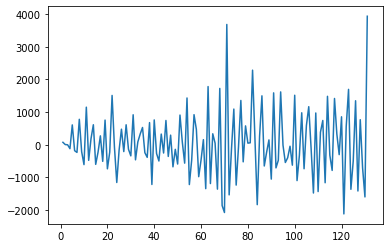

In [54]:
diff_sea = list()
X = diff.values
months_in_year = 12
for i in range(months_in_year, len(df_shopping)):
	value = X[i] - X[i - months_in_year]
	diff_sea.append(value)
plt.plot(diff_sea)
plt.show()

In [55]:
for i in range(months_in_year):
    diff_sea.append(np.nan)

In [57]:
# df_shopping['diff'] = diff
df_shopping['diff_adj'] = diff_sea

In [58]:
df_shopping.head()

,mdollars,detrended,detrended_adj,mdollars_lin_pred_arma,mdollars_lin_pred_total,diff,diff_adj
month,,,,,,,
2002-01-01,9912,1366.383525,1906.065561,NaN,NaN,NaN,NaN
2002-02-01,8925,235.887582,2154.065561,NaN,NaN,-987.0,73.0
2002-03-01,9670,837.391639,1101.065561,NaN,NaN,745.0,4.0
2002-04-01,9684,707.895696,1840.898895,NaN,NaN,14.0,-2.0
2002-05-01,9713,593.399754,1445.065561,NaN,NaN,29.0,-122.0


In [21]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

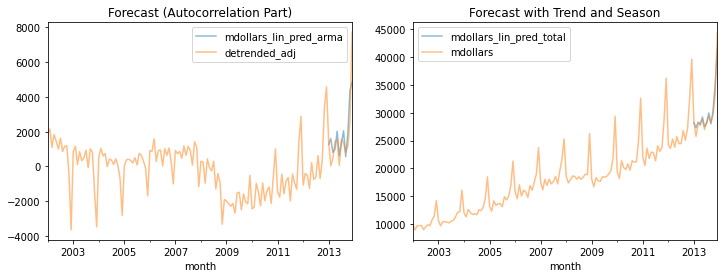

In [42]:
Y_train = df_shopping[df_shopping.index.year != 2013]['detrended_adj'].values

model = ARIMA(Y_train,order=(15,1,0))
model_fit = model.fit()

y_pred = model_fit.forecast(steps=12)

# we must not forget to add the trend and the seasonal effect
y_pred_lin_adj = y_pred + trend[df_shopping.index.get_loc('2013-01-01'):].flatten() +monthly_means.values

df_shopping['mdollars_lin_pred_arma'] = np.NaN
df_shopping['mdollars_lin_pred_total'] = np.NaN
df_shopping.loc[df_shopping.index.year == 2013, 'mdollars_lin_pred_arma'] = y_pred
df_shopping.loc[df_shopping.index.year == 2013, 'mdollars_lin_pred_total'] = y_pred_lin_adj

fig, axes = plt.subplots(1,2,figsize=(12,4))
df_shopping[['mdollars_lin_pred_arma', 'detrended_adj']].plot(alpha=0.5, title='Forecast (Autocorrelation Part)', ax=axes[0])
df_shopping[['mdollars_lin_pred_total', 'mdollars']].plot(alpha=0.5, title='Forecast with Trend and Season', ax=axes[1])
plt.show()

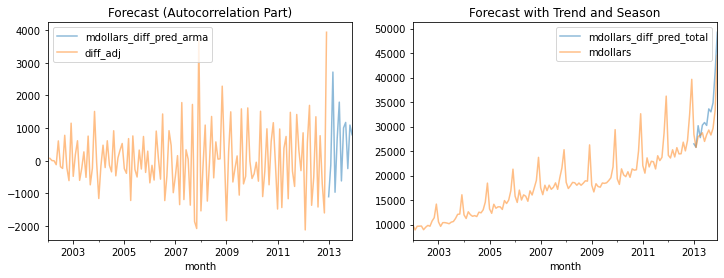

In [60]:
Y_train = df_shopping[df_shopping.index.year != 2013]['diff_adj'].dropna().values

model = ARIMA(Y_train, order=(2,1,0))
model_fit = model.fit()

y_pred = model_fit.forecast(steps=12)

y_pred_diff_adj = y_pred.copy()
# add season -> add values prior to seasonal adjustment
for i in range(0, 12):
    y_pred_diff_adj[i] += df_shopping.iloc[-24+i]['diff'] # add value from last year of with seasonal effect
# add trend -> add values prior to differencing for trend
y_pred_diff_adj[0] += df_shopping.iloc[-13]['mdollars']
for i in range(1,12):
    y_pred_diff_adj[i] += y_pred_diff_adj[i-1]


df_shopping['mdollars_diff_pred_arma'] = np.NaN
df_shopping['mdollars_diff_pred_total'] = np.NaN
df_shopping.loc[df_shopping.index.year == 2013, 'mdollars_diff_pred_arma'] = y_pred
df_shopping.loc[df_shopping.index.year == 2013, 'mdollars_diff_pred_total'] = y_pred_diff_adj

fig, axes = plt.subplots(1,2,figsize=(12,4))
df_shopping[['mdollars_diff_pred_arma', 'diff_adj']].plot(alpha=0.5, title='Forecast (Autocorrelation Part)', ax=axes[0])
df_shopping[['mdollars_diff_pred_total', 'mdollars']].plot(alpha=0.5, title='Forecast with Trend and Season', ax=axes[1])
plt.show()

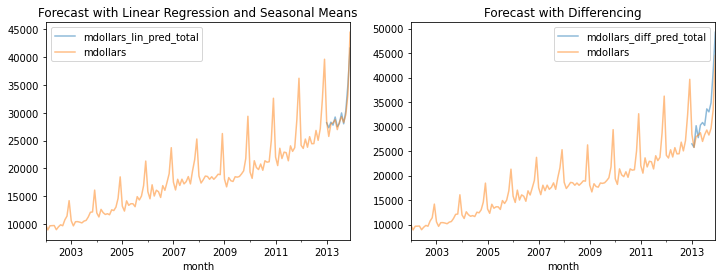

In [61]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
df_shopping[['mdollars_lin_pred_total', 'mdollars']].plot(alpha=0.5, title='Forecast with Linear Regression and Seasonal Means', ax=axes[0])
df_shopping[['mdollars_diff_pred_total', 'mdollars']].plot(alpha=0.5, title='Forecast with Differencing', ax=axes[1])
plt.show()

#### **Ex4**: Text Mining
Analyze textual data. You will perform various processing steps and see how the results of a 
simple visualization through word clouds evolve. Dataset “Trump_tweets_2017”
##### Word clouds without pre-processing
Load the data and create a word cloud without any further processing of the text data. Does this 
already work? What are problems?
##### Pre-processing textual data
Clean up the textual data, e.g., using the methods discussed in the lecture. Create a new word 
cloud based on the cleaned corpus.
##### Use TF-IDF instead of TF
The word clouds are based on simple term frequencies (TF) by default. Calculate the tf-idf, i.e., 
the term frequency weighted with the inverse document frequency and create a new word cloud 
based on these frequencies. How does it change

In [6]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
mask = np.array(Image.open("D:\Learnmore\DBM\Data Mining\\trump.jpg"))

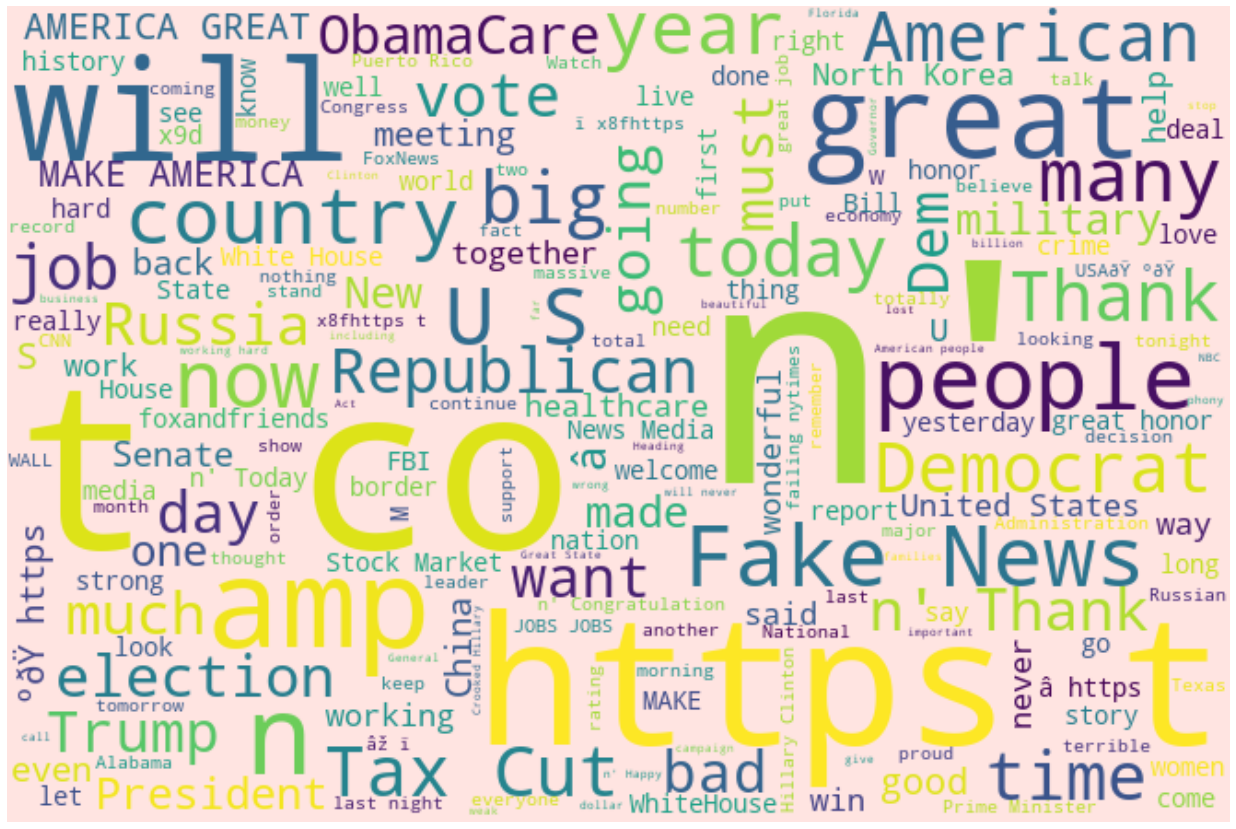

In [8]:
# directly load from the url instead of using the file
word = []
with open("D:\Learnmore\DBM\Data Mining\Dataset\Trump_tweets_2017.txt", encoding="utf8") as file:
    for line in file:
        word.append(line)
     
wordcloud_cv = WordCloud(background_color="mistyrose", mode="RGB", mask=mask).generate(str(word))
plt.figure(figsize=[50,15])
plt.axis('off')
plt.imshow(wordcloud_cv, interpolation="bilinear")
plt.show()

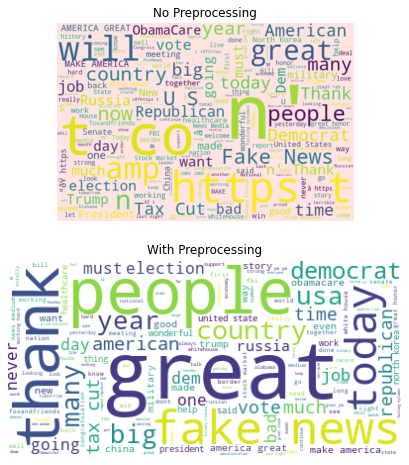

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

processed_corpus = []
for tweet in word:
    # remove links
    modified_tweet = re.sub(r'http\S+', '', tweet).strip()
    # remove &amp; (html entity for &)
    modified_tweet = modified_tweet.replace('&amp;', '')
    # remove punctuation
    modified_tweet = modified_tweet.translate(str.maketrans('', '', string.punctuation))
    # replace US with USA
    modified_tweet = modified_tweet.replace('US', 'usa')
    # lower case
    modified_tweet = modified_tweet.lower()

    # now we tokenize, because the following operations work on the word-level
    words = word_tokenize(modified_tweet)
    modified_tweet = ' '.join([lemmatizer.lemmatize(w)
                               for w in words if w.isalpha() and w not in stop_words])
    processed_corpus.append(modified_tweet)

wc_processed = WordCloud(background_color="white")
wc_processed.generate(' '.join(processed_corpus))

fig, axes = plt.subplots(2, 1, figsize=(12,8))
axes[0].axis('off')
axes[0].imshow(wordcloud_cv, interpolation="bilinear")
axes[0].set_title('No Preprocessing')
axes[1].axis('off')
axes[1].imshow(wc_processed, interpolation="bilinear")
axes[1].set_title('With Preprocessing')
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

d:\Python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


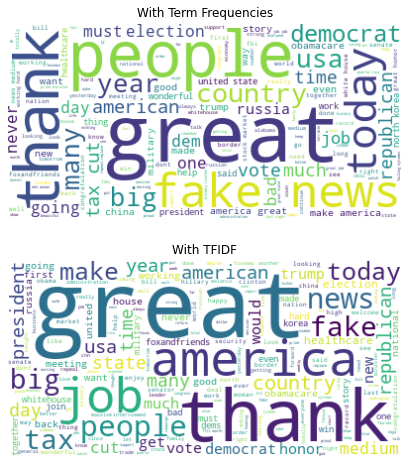

In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_corpus)

frequencies = pd.DataFrame(
    data=X.toarray(), columns=vectorizer.get_feature_names()).sum().to_dict()

wc_tfidf = WordCloud(background_color="white")
wc_tfidf.generate_from_frequencies(frequencies)

fig, axes = plt.subplots(2, 1, figsize=(12,8))
axes[0].axis('off')
axes[0].imshow(wc_processed, interpolation="bilinear")
axes[0].set_title('With Term Frequencies')
axes[1].axis('off')
axes[1].imshow(wc_tfidf, interpolation="bilinear")
axes[1].set_title('With TFIDF')
plt.show()